# Finite difference approximations

Finite dierence approximations

這個章節是在簡介以有限差分法近似微分。首先介紹幾個簡單的差分法$D_+$、$D_-$以及$D_0$

\begin{eqnarray}
D_+u(\hat{u}) &=& \frac{u(\hat{x}+h)-u(\hat{x})}{h}\\
D_-u(\hat{u}) &=& \frac{u(\hat{x})-u(\hat{x}-h)}{h}\\
D_0u(\hat{u}) &=& \frac{u(\hat{x}+h)-u(\hat{x}-h)}{2h}\\
\end{eqnarray}

在使用python計算之前，我們先引入幾個函式庫：
* scipy: 科學計算常用的函式 (底下的引用，將會引入數值積分函數，不過我們暫時不會用到)
* matplotlib: 繪圖用 (頻繁使用的函式庫)
* numpy: 快速處理數據

In [2]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

上述的使用函式庫方式，在使用numpy函式庫時，可以用np簡稱。比方說我們要顯示$\pi$值

In [3]:
print np.pi

3.14159265359


或是要顯示$\sin{\pi}$

In [4]:
print np.sin(np.pi)

1.22464679915e-16


### Note 格式化輸出範例

In [5]:
mystr =  'The Value is {:.6f}'
print mystr.format(np.pi)

The Value is 3.141593


In [6]:
mystr2 =  'The values are {:.6g} and {:.6f}'
print mystr2.format(np.sin(np.pi),np.e)

The values are 1.22465e-16 and 2.718282


接著我們定義函數$u(x)$，之後我們就可以直接使用此函數。注意定義的方式

In [7]:
def u(x):
    uval = np.sin(x)
    return uval

def udiff(x):
    duval = np.cos(x)
    return duval

簡單測試一下是否能正確呼叫$u(x)$

In [8]:
print u(np.pi)

1.22464679915e-16


接著我們定義三個差分函數$D_+$、$D_-$以及$D_0$

In [9]:
def up(x,h):
    upval = (u(x+h)-u(x))/h
    return upval

def um(x,h):
    umval = (u(x)-u(x-h))/h
    return umval

def u0(x,h):
    u0val = (u(x+h)-u(x-h))/(2*h)
    return u0val

def u3(x,h):
    u3val = (2*u(x+h)+3*u(x)-6*u(x-h)+u(x-2*h))/(6*h)
    return u3val

In [10]:
print up(1,0.1)-udiff(1)
print um(1,0.1)-udiff(1)
print u0(1,0.1)-udiff(1)
print u3(1,0.1)-udiff(1)

-0.0429385533328
0.041138445936
-0.00090005369838
6.82069338306e-05


以上這些值可以和講義上的結果比較。


In [11]:
h_lst = [0.1, 0.05, 0.01, 0.005, 0.0001]
print "h         D+         D-         D0         D3"
for h in h_lst:
    errp = up(1,h)-udiff(1)
    errm = um(1,h)-udiff(1)
    err0 = u0(1,h)-udiff(1)
    err3 = u3(1,h)-udiff(1)
    print errp, errm, err0, err3


h         D+         D-         D0         D3
-0.0429385533328 0.041138445936 -0.00090005369838 6.82069338306e-05
-0.0212574901457 0.0208072945023 -0.000225097821707 8.64914174081e-06
-0.00421632485627 0.00419831486946 -9.00499340617e-06 6.99412994187e-08
-0.00210592433618 0.00210142182256 -2.25125680842e-06 8.75399974731e-09
-4.20744495185e-05 4.20726486597e-05 -9.0042939771e-10 -2.2359891716e-13


底下的寫法是使用numpy功能來進行向量式計算，最後以迴圈方式顯示。

In [12]:
h_lst = np.array([0.1, 0.05, 0.01, 0.005, 0.0001])
errp = np.zeros(len(h_lst))
print "h         D+         D-         D0         D3"
errp = up(1,h_lst)-udiff(1)
errm = um(1,h_lst)-udiff(1)
err0 = u0(1,h_lst)-udiff(1)
err3 = u3(1,h_lst)-udiff(1)

for ii in range(len(h_lst)):
    print h_lst[ii],errp[ii],errm[ii],err0[ii],err3[ii]

h         D+         D-         D0         D3
0.1 -0.0429385533328 0.041138445936 -0.00090005369838 6.82069338306e-05
0.05 -0.0212574901457 0.0208072945023 -0.000225097821707 8.64914174081e-06
0.01 -0.00421632485627 0.00419831486946 -9.00499340617e-06 6.99412994187e-08
0.005 -0.00210592433618 0.00210142182256 -2.25125680842e-06 8.75399974731e-09
0.0001 -4.20744495185e-05 4.20726486597e-05 -9.0042939771e-10 -2.2359891716e-13


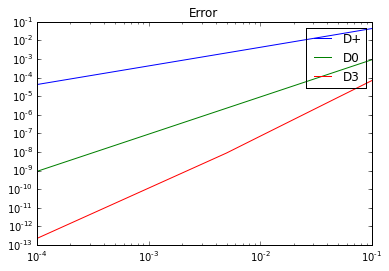

In [13]:
plt.loglog(h_lst,abs(errp),label="D+")
plt.loglog(h_lst,abs(err0),label="D0")
plt.loglog(h_lst,abs(err3),label="D3")
plt.legend()
plt.title('Error')

plt.show() 

### Rate of Convergence (Curve Fitting)
* http://scipy.github.io/old-wiki/pages/Cookbook/FittingData

In [14]:
logE = np.log(abs(err0))
logh = np.log(h_lst)
# Initial guess.
x0    = np.array([0.0, 0.0, 0.0])

import scipy.optimize as optimization
def func(x, p, c):
    return p*x + c
print logE
print logh
myresult =  optimization.curve_fit(func, logh, logE)
print myresult[0]
print myresult[1]


[ -7.01305613  -8.39897549 -11.61773131 -13.00402192 -20.82814936]
[-2.30258509 -2.99573227 -4.60517019 -5.29831737 -9.21034037]
[ 1.99995997 -2.40772419]
[[  1.41300206e-09   6.89888226e-09]
 [  6.89888226e-09   4.19340681e-08]]


In [18]:

xdata = np.transpose(np.array([[1.0,1.0,1.0,1.0,1.0,1.0],
              [0.0,1.0,2.0,3.0,4.0,5.0]]))
#print xdata
#print h_lst
a = np.ones(len(h_lst))
b = logh
xdata = np.transpose(np.vstack((a,b)))
ydata = logE
x0 = np.array([0.0,0.0])
#print xdata
def func2(params, xdata, ydata):
    return (ydata - np.dot(xdata, params))

myresult2 = optimization.leastsq(func2, x0,args=(xdata, ydata))
print myresult2

(array([-2.40772419,  1.99995997]), 3)


底下內容是尚未修改內容，請忽略。

In [2]:
alpha=0.1
beta=0.015
gamma=0.0225
delta=0.02
def system(z,t):
    x,y=z[0],z[1]
    dxdt= x*(alpha-beta*y)
    dydt=-y*(gamma-delta*x)
    return [dxdt,dydt]

t=np.linspace(0,300.,1000)
x0,y0=1.0,1.0
sol=odeint(system,[x0,y0],t)

底下是以matplotlib將得到的數值解匯出，首先是在相平面作圖：

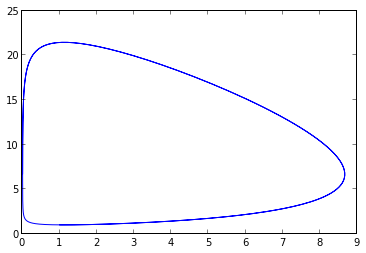

In [3]:
X,Y=sol[:,0],sol[:,1]
plt.plot(X,Y)
plt.show() 

底下是x、y對t作圖，其中x的圖形以紅色(r)表示，y的圖形以藍色(b)表示。

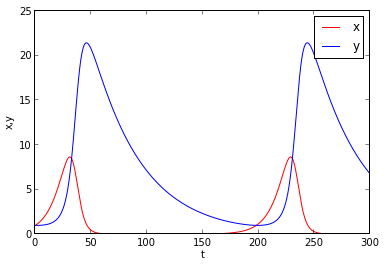

In [4]:
px, = plt.plot(t,X,'r-')
py, = plt.plot(t,Y,'b-')
plt.xlabel("t")   
plt.ylabel("x,y") 
plt.legend([px,py],["x","y"])
plt.show() 

底下是另一個簡單的例子

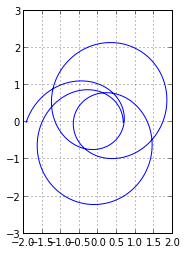

In [5]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
pi = np.pi
sqrt = np.sqrt
cos = np.cos
sin = np.sin

def deriv_z(z, phi):
    u, udot = z
    return [udot, -u + sqrt(u)]

phi = np.linspace(0, 7.0*pi, 2000)
zinit = [1.49907, 0]
z = odeint(deriv_z, zinit, phi)
u, udot = z.T
# plt.plot(phi, u)
fig, ax = plt.subplots()
ax.plot(1/u*cos(phi), 1/u*sin(phi))
ax.set_aspect('equal')
plt.grid(True)
plt.show()

<li>SciPy-數值計算庫：http://myshare.dscloud.me/scipydoc/scipy_intro.html</li>
<li>繪圖指令請參考： http://onionys.blogspot.tw/2012/01/python-matplotlib.html</li>
<li>更多的matplotlib： http://nbviewer.ipython.org/github/c3h3/NCCU-PyData-Courses-2013Spring/blob/master/Lecture4/visualization/BasicMatplotlib.ipynb</li>